In [2]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data = pd.read_csv('Lab7_Part1.csv')
data = pd.DataFrame(data).to_numpy()
time = data[:,0]
force = data[:,1]
position = data[:,2]


In [15]:
def model_lin(x, m, c):
    return m * x + c

def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 


In [16]:
mInit = 0.5
cInit = 0.2

parameters, covariance = opt.curve_fit(model_lin, position, force, p0=[mInit,cInit])

slope = parameters[0] 
intcp = parameters[1] 
slope_err = np.sqrt(covariance[0][0])
intcp_err = np.sqrt(covariance[1][1])

y_model = model_lin(position, slope, intcp) # Y values predicted with our model



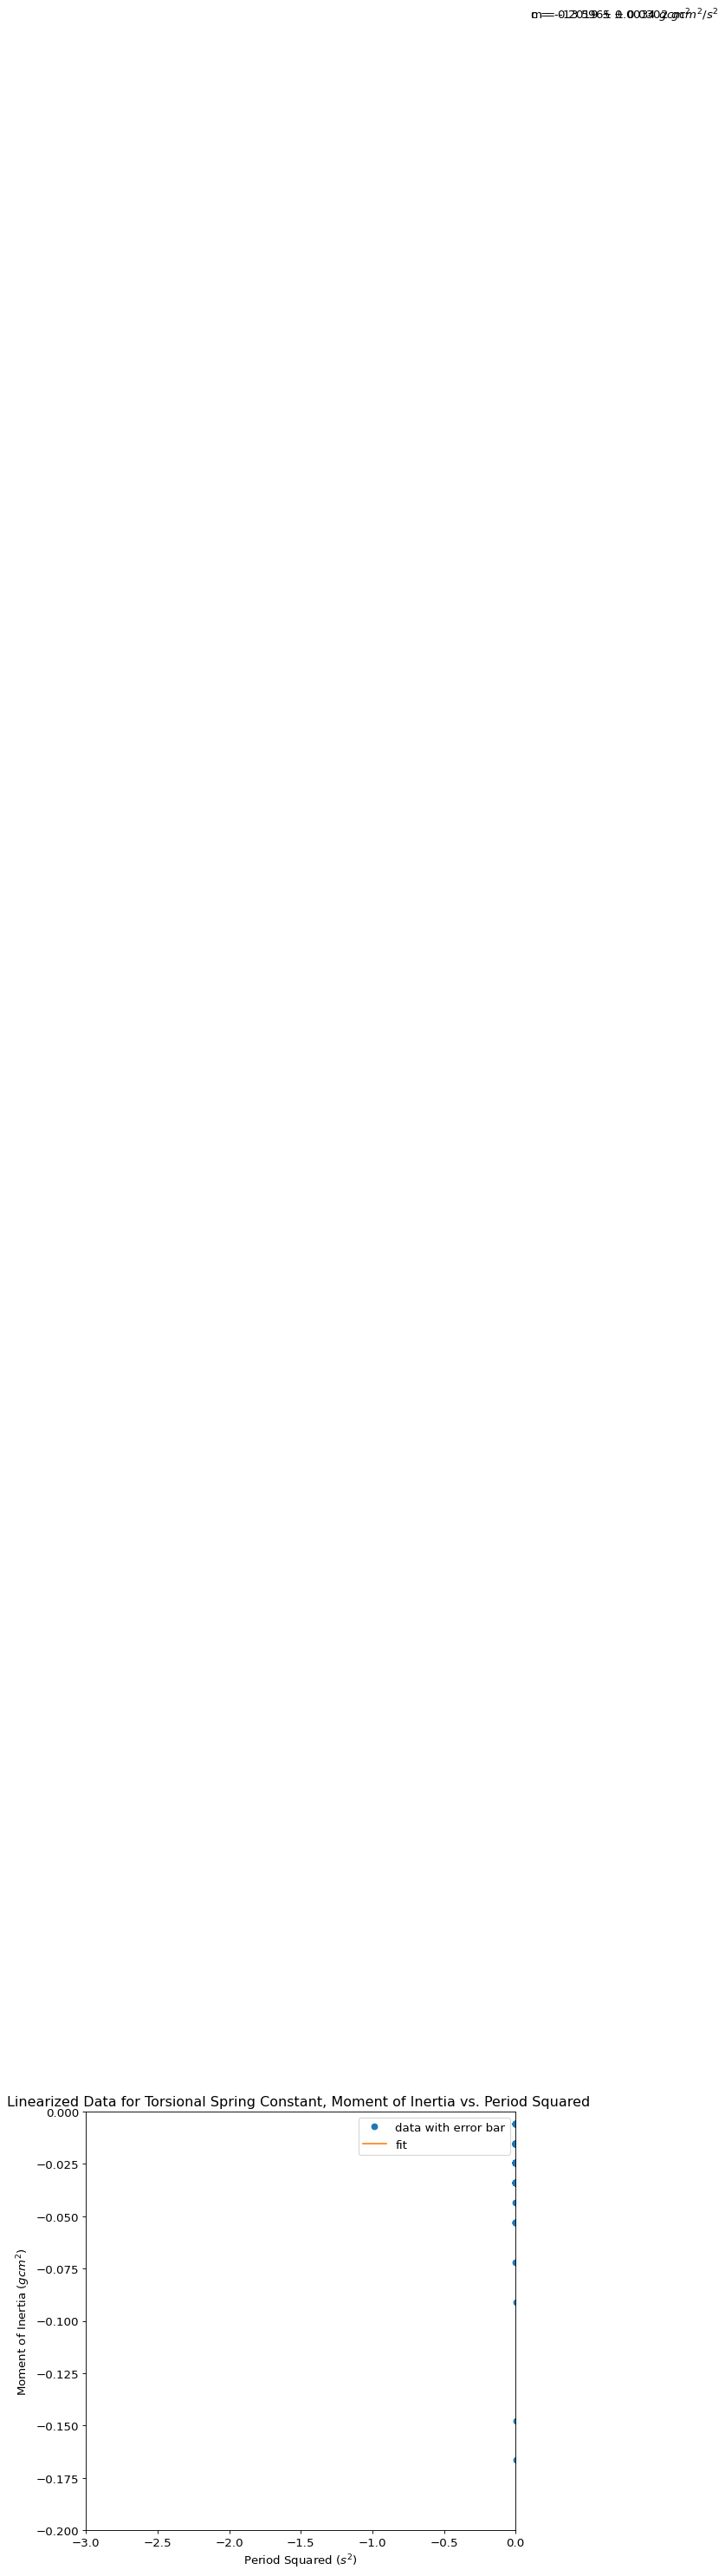

In [22]:
# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(position, force,  fmt='o', capsize = 3, capthick = 1, label="data with error bar")
plt.errorbar(np.linspace(0,10), model_lin(np.linspace(0,10), slope, intcp), label='fit')

plt.title("Linearized Data for Torsional Spring Constant, Moment of Inertia vs. Period Squared ")
plt.xlabel("Period Squared ($s^2$)")
plt.ylabel("Moment of Inertia ($gcm^2$)")

plt.text(0.1,1, "m = %5.4f \u00b1 %5.4f $g cm^2/s^2$" % (slope, slope_err))
plt.text(0.1,1, "c = %5.4f \u00b1 %5.4f $gcm^2$" % (intcp, intcp_err))
plt.xlim(-3, 0)
plt.ylim(-.2,0)
plt.legend()
plt.show()

